# 1. Gruping


## 1.1. K-means

Centorids are: 
[[ 25.68028759  24.82146845]
 [151.5897625  157.2112693 ]
 [ 88.39681673  87.51574804]]
prediction for vertex 297, 103: [1]


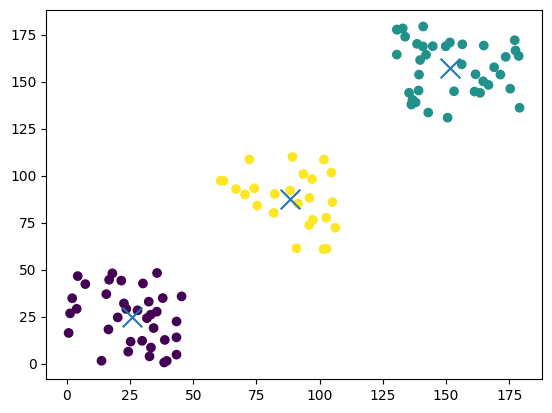

In [10]:
import numpy as np
import matplotlib.pyplot as plt
podaci = np.random.uniform(0,50, size=(100,2))
podaci[35:60] += 60
podaci[61:] += 130

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, n_init = 1, random_state=24)

kmeans.fit(podaci)
centroidi = kmeans.cluster_centers_
print(f"Centorids are: \n{centroidi}")

grupe = kmeans.predict(podaci)

plt.scatter(podaci[:, 0], podaci[:, 1], c=grupe)
plt.scatter(centroidi[:, 0], centroidi[:, 1], marker="x", s = 200)

print(f"prediction for vertex 297, 103: {kmeans.predict([[297, 103]])}")

### 1.1.1. Elbow

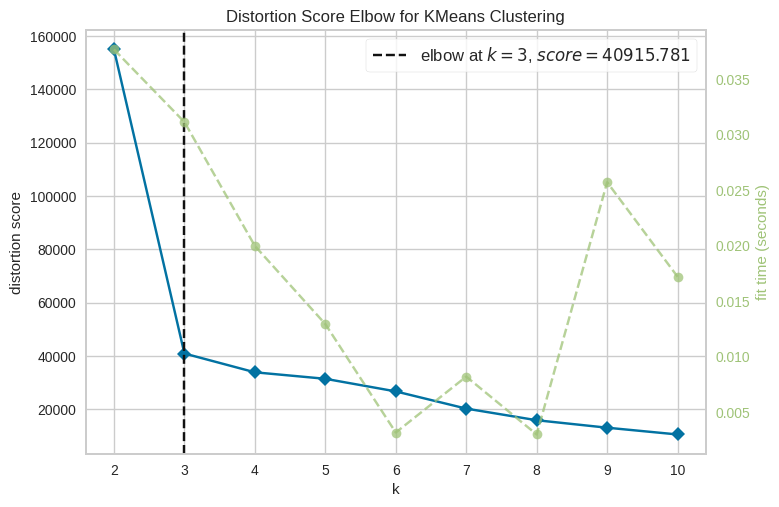

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(kmeans)

visualizer.fit(podaci)
visualizer.show()

### 1.1.2. Silhouette

In [18]:
from sklearn import metrics
score = metrics.silhouette_score(podaci, grupe)

print(f"Silhouette score is {score}")

def clusters_test(podaci):
  max_score = 0
  best_cluster = 0

  for i in range(2, 11):
    grupe = KMeans(n_clusters = i, n_init = 1, random_state = 24).fit_predict(podaci)
    score = metrics.silhouette_score(podaci, grupe)

    if score > max_score:
      max_score = score
      best_cluster = i

  print(f"Best score is with {best_cluster} and it is {score}")

clusters_test(podaci)

Silhouette score is 0.7101541847758566
Best score is with 3 and it is 0.4191816101573009


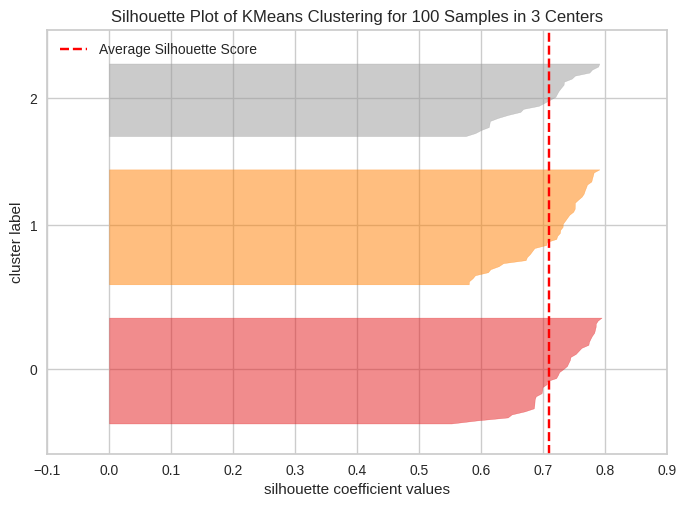

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 100 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [20]:
from yellowbrick.cluster import SilhouetteVisualizer
kmeans = KMeans(n_clusters = 3, n_init = 1, random_state = 24)
visualizer = SilhouetteVisualizer(kmeans)

visualizer.fit(podaci).show()

### 1.1.3. Working with pictures

Inital image shape (334, 500, 3)
Reshaped image to (167000, 3)


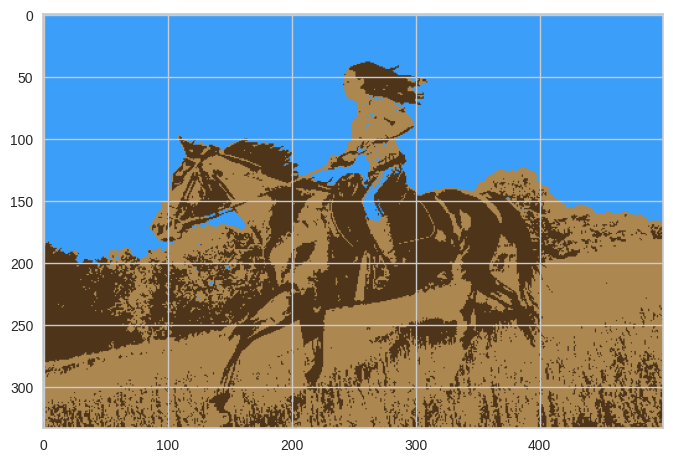

In [30]:
from matplotlib.image import imread
image = imread("/content/konj1.jpg")

print(f"Inital image shape {image.shape}")

X = image.reshape(-1, 3)
print(f"Reshaped image to {X.shape}")

kmeans = KMeans(n_clusters = 3, n_init = 1, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.astype(int)

pciture_in_color = segmented_img.reshape(image.shape)
plt.imshow(pciture_in_color)

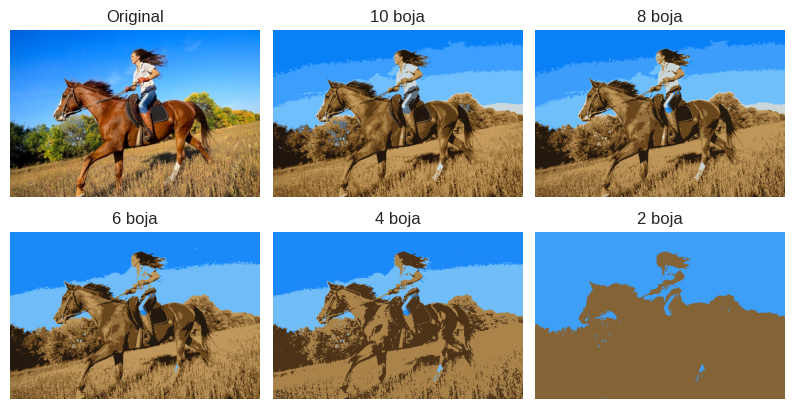

In [32]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
  km = KMeans(n_clusters = n_clusters, n_init = 1, random_state = 42).fit(X)
  segmented_img = km.cluster_centers_[km.labels_]
  segmented_imgs.append(segmented_img.reshape(image.shape).astype(int))

plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)  #2,3,1  #row, col, pos
plt.imshow(image)
plt.title("Original")
plt.axis('off')

for i, n_clusters in enumerate(n_colors):
  plt.subplot(232+i)
  plt.imshow(segmented_imgs[i])
  plt.title(f"{n_clusters} boja")
  plt.axis("off")

plt.show()

# 2. Linear regression

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Slope: 0.2895133597270679
Intercept: 30.77333854704392
Koeficijent determinacije: 0.12738995571133382
Varijanca (MSE): 206.60816067158848


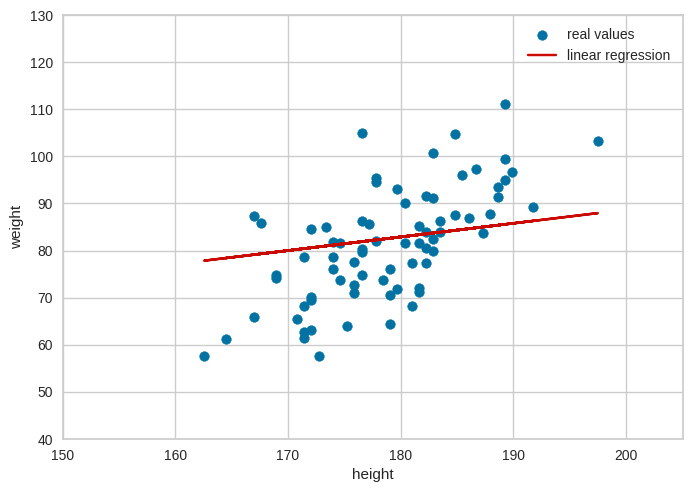

In [42]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

baza = datasets.fetch_openml("bodyfat", version = 1)
data = baza.data
data.head(5)

data.dropna(subset = ["Height", "Weight"])

x = data["Height"] * 2.54
y = data["Weight"] * 0.46

x = x.values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 23)

model = LinearRegression().fit(x_train,y_train)
y_pred = model.predict(x_test)

plt.scatter(x_test, y_test, label = "real values")
plt.plot(x_test, y_pred, label = "linear regression", c="r")
plt.xlabel("height")
plt.ylabel("weight")
plt.xlim(150, 205)
plt.ylim(40, 130)
plt.legend()

print(f'Slope: {model.coef_[0]}')
print(f'Intercept: {model.intercept_}')

print(f"Koeficijent determinacije: {model.score(x_test, y_test)}")
print(f"Varijanca (MSE): {mean_squared_error(y_test, y_pred)}")

## 2.1. Optimization

In [59]:
outlier_x = np.where(x_train < 150)[0]
outlier_y = np.where(y_train > 120)[0]

outlier_index = np.concatenate((outlier_x, outlier_y)).tolist()
print(outlier_index)

newX = np.delete(x_train, outlier_index)
newY = np.delete(np.array(y_train), outlier_index)

[148, 173]


## 2.2. Multivariant linear regression

In [66]:
from sklearn.preprocessing import normalize

baza = datasets.fetch_openml("cars")
data = baza.data
data.head(5)

data.dropna(subset = ["mpg", "horsepower", "weight", "acceleration"])

x = data.iloc[50:100, [3,4,5]]
y = data.iloc[50:100, [0]]

x = normalize(x)
y = y/np.amax(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 23)

model = LinearRegression().fit(x_train, y_train)
y_pred = model.predict(x_test)

print(model.score(x_test, y_test))
print(mean_squared_error(y_test, y_pred))

print(model.predict(normalize([[100,3000,20]])))

0.6471679630815892
0.009557347800935525
[[0.65973138]]


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name cars exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


# 3. Classification


## 3.1. KNN

In [68]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
baza = datasets.load_iris()

X=baza.data
y=baza.target

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.50, random_state=42)

modelKNN=KNeighborsClassifier(n_neighbors=3)
modelKNN.fit(X_train,y_train)
y_pred_KNN=modelKNN.predict(X_test)

print(f"Accuracy {modelKNN.score(X_test,y_test)} or {accuracy_score(y_test,y_pred_KNN)}")

Accuracy 0.9733333333333334 or 0.9733333333333334


### 3.1.1. Confusion matrix

In [69]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_KNN)

array([[29,  0,  0],
       [ 0, 23,  0],
       [ 0,  2, 21]])

### 3.1.2 Precision

precision = TP/(TP+FP)

In [70]:
from sklearn.metrics import precision_score

every_class = precision_score(y_test,y_pred_KNN, average=None)

whole_model = precision_score(y_test, y_pred_KNN, average='micro')

print(f"Precision per every class: {every_class}")
print(f"Precision for whole model: {whole_model}")

Precision per every class: [1.   0.92 1.  ]
Precision for whole model: 0.9733333333333334


### 3.1.3. Recall

recall = TP/(TP+FN)

In [71]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred_KNN, average=None)

array([1.        , 1.        , 0.91304348])

### 3.1.4. Evaluation

In [73]:
# F1 score
from sklearn.metrics import f1_score
f1_score(y_test,y_pred_KNN,average=None)

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_KNN,target_names=baza.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        29
  versicolor       0.92      1.00      0.96        23
   virginica       1.00      0.91      0.95        23

    accuracy                           0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75



## 3.2. GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
modelNB= GaussianNB()
modelNB.fit(X_train, y_train)
modelKNN.score(X_test,y_test)

y_pred_NB=modelNB.predict(X_test)
print(classification_report(y_test,y_pred_NB,target_names=baza.target_names))

## 3.3. Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model_LogR=LogisticRegression()

model_LogR.fit(X_train,y_trian)
model_LogR.score(X_test,y_test)

print(classification_report(y_test,model_LogR.predict(X_test)))
confusion_matrix(y_test,model_LogR.predict(X_test))

y_pred_LogR=model_LogR.predict(X_test)
y_test.shape

misclassified_index=[]
for i in range (y_test.shape[0]):
  if y_test[i]!=y_pred_LogR[i]:
    misclassified_index.append(i)

for i,index in enumerate(misclassified_index[0:5]):
  plt.subplot(1,5,i+1)
  plt.imshow(X_test[misclassified_index[i]].reshape(28,28))
plt.show()

In [ ]:
# ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred_LogR) #površina ispd krivulje
fpr, tpr, thresholds = roc_curve(y_test, y_pred_LogR)  #crtanje krivulje
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'k--') #dijagonala
plt.axis([0, 1, 0, 1]) #
plt.xlabel('False Positive Rate = 1- Specificity')
plt.ylabel('True Positive Rate = Sensitivity')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()